# Yelp Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from pylab import figure, axes, pie, title, show
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#data = pd.read_csv('AFFReviews.csv', delimiter=",", header=0)
data = pd.read_csv('Yelp_reviews.csv', sep=',', index_col=False)
print data.info()
print data.head()
#data.to_csv('Reviews_clean.csv', index=False, encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153150 entries, 0 to 4153149
Data columns (total 2 columns):
stars    int64
text     object
dtypes: int64(1), object(1)
memory usage: 63.4+ MB
None
   stars                                               text
0      5  If you enjoy service by someone who is as comp...
1      5  After being on the phone with Verizon Wireless...
2      5  Great service! Corey is very service oriented....
3      5  Highly recommended. Went in yesterday looking ...
4      4  I walked in here looking for a specific piece ...


In [3]:
print data.stars[0]
print data.text[0]

5
If you enjoy service by someone who is as competent as he is personable, I would recommend Corey Kaplan highly. The time he has spent here has been very productive and working with him educational and enjoyable. I hope not to need him again (though this is highly unlikely) but knowing he is there if I do is very nice. By the way, I'm not from El Centro, CA. but Scottsdale, AZ.


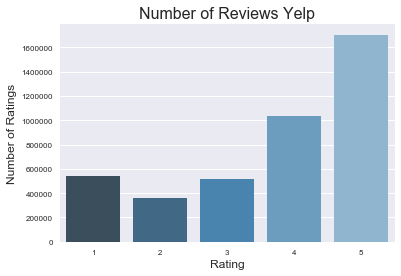

In [4]:
#Graph - Score
ax = sns.countplot(data['stars'], palette='Blues_d')
ax.set_xlabel('Rating', fontsize = 12)
ax.set_ylabel('Number of Ratings', fontsize = 12)
ax.set_title('Number of Reviews Yelp', fontsize=16)
ax.tick_params(labelsize = 8)
pylab.rcParams['figure.figsize'] = (4, 8)
plt.show()
fig = ax.get_figure()
#fig.savefig("AFF.png")

In [7]:
data['stars'].value_counts()

5    1704200
4    1032654
1     540377
3     517369
2     358550
Name: stars, dtype: int64

In [8]:
#remove rows which contain ratings of 3 (Neutral and not included in our analysis.)
data = data[data.stars != 3]
print(data.head())
data['stars'].value_counts() 

   stars                                               text
0      5  If you enjoy service by someone who is as comp...
1      5  After being on the phone with Verizon Wireless...
2      5  Great service! Corey is very service oriented....
3      5  Highly recommended. Went in yesterday looking ...
4      4  I walked in here looking for a specific piece ...


5    1704200
4    1032654
1     540377
2     358550
Name: stars, dtype: int64

In [10]:
#create 2 datasets and merge them. 
negative_sample = data.loc[data.stars <=2]
positive_sample = data.loc[data.stars >=4]

In [11]:
print len(negative_sample)
print len(positive_sample)

898927
2736854


In [14]:
#Create a sample dataset so we can evenly match the amount of pos/neg examples/  
size = 100000
subdata = positive_sample.sample(n = size, random_state=520)

#subdata = subdata[pd.notnull(subdata['text'])] - to get rid of null values

print subdata.index
subdata.to_csv('Yelp_Pos_100k.csv', index=False, sep=',', encoding='utf-8')

Int64Index([ 385460, 3353423, 2987893, 2708925, 3664065, 2173157, 1495693,
            1799867,  589366,  584027,
            ...
             678504, 2103389, 3144383, 2688079, 1610583, 2501566, 2777932,
            1757332, 4082975, 2044297],
           dtype='int64', length=100000)


In [15]:
#Load in the sample data
pos_data = pd.read_csv('Yelp_Pos_100k.csv', index_col=False)
print pos_data.iloc[:5]

   stars                                               text
0      5  I just got my reading glasses back and have no...
1      5  Absolutely the "Best of Phoenix". Caring compa...
2      5  I've been coming here for about 4 years now. I...
3      5  The food was hot and tasty. The garlic knots a...
4      4  This place is delicious!! I love the salmon an...


Create Negative Examples Dataset

In [16]:
#Create a sample dataset so we can evenly match the amount of pos/neg examples/  
size = 100000 
subdata = negative_sample.sample(n = size, random_state=520)

#subdata = subdata[pd.notnull(subdata['text'])] - to get rid of null values

print subdata.index
subdata.to_csv('Yelp_Neg_100k.csv', index=False, sep=',', encoding='utf-8')

Int64Index([1733431, 2853829, 1169950, 1707283, 3189730, 1478436, 2379891,
             517319, 2641068,  863780,
            ...
            2454555,  799614,  329041,  152175,  698728, 4138165, 1150573,
            1132004, 2146249, 3997351],
           dtype='int64', length=100000)


In [17]:
#Load in the sample data
neg_data = pd.read_csv('Yelp_Neg_100k.csv', index_col=False)
print neg_data.iloc[:5]

   stars                                               text
0      1  It was good once I ate it but after I got a fo...
1      1  My wife and I went here last night before the ...
2      1  I had a poor experience with my last rental wi...
3      1  I live in one of the apartment buildings in th...
4      2  You don't get much for your player card status...


Merge the positive and negative datasets so that we have one highly balanced dataset

In [18]:
# stack the DataFrames on top of each other
merged = pd.concat([pos_data, neg_data], axis=0)

In [19]:
print merged.head()

   stars                                               text
0      5  I just got my reading glasses back and have no...
1      5  Absolutely the "Best of Phoenix". Caring compa...
2      5  I've been coming here for about 4 years now. I...
3      5  The food was hot and tasty. The garlic knots a...
4      4  This place is delicious!! I love the salmon an...


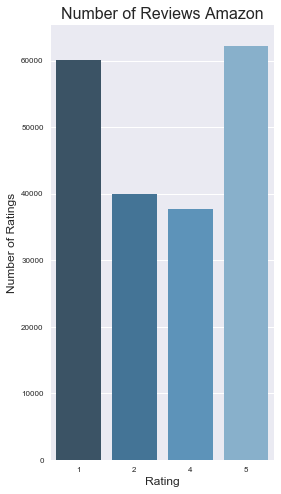

In [21]:
#Graph - Score
ax = sns.countplot(merged['stars'], palette='Blues_d')
ax.set_xlabel('Rating', fontsize = 12)
ax.set_ylabel('Number of Ratings', fontsize = 12)
ax.set_title('Number of Reviews Amazon', fontsize=16)
ax.tick_params(labelsize = 8)
pylab.rcParams['figure.figsize'] = (4, 8)
plt.show()
fig = ax.get_figure()
#fig.savefig("AFF.png")

In [25]:
merged.loc[merged.stars <=2, 'stars'] = 0
merged.loc[merged.stars >=4, 'stars'] = 1
        
merged['stars'].value_counts()

1    100000
0    100000
Name: stars, dtype: int64

In [26]:
#Now that we have a balanced dataset, we can save it to a CSV file so that it can be used in our
#analysis

merged.to_csv('Yelp_Evenly_Sampled.csv', index=False, sep=',', encoding='utf-8')

In [28]:
#Load in the new data
data = pd.read_csv('Yelp_Evenly_Sampled.csv', index_col=False)
print data.iloc[:5]
data['stars'].value_counts()

   stars                                               text
0      1  I just got my reading glasses back and have no...
1      1  Absolutely the "Best of Phoenix". Caring compa...
2      1  I've been coming here for about 4 years now. I...
3      1  The food was hot and tasty. The garlic knots a...
4      1  This place is delicious!! I love the salmon an...


1    100000
0    100000
Name: stars, dtype: int64